In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
%matplotlib inline

In [5]:
df = pd.read_csv('kyphosis.csv')

In [6]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


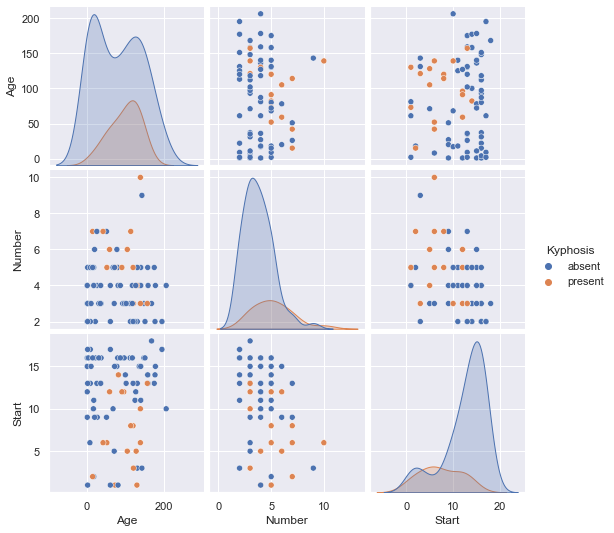

In [8]:
sns.pairplot(df, hue = 'Kyphosis')

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = df.drop('Kyphosis', axis = 1)
y = df['Kyphosis']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

#### Decision Tree Model

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
dtree = DecisionTreeClassifier()

In [14]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [15]:
predictions = dtree.predict(X_test)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
print(confusion_matrix(y_test, predictions), '\n')
print(classification_report(y_test, predictions))

[[12  7]
 [ 1  5]] 

              precision    recall  f1-score   support

      absent       0.92      0.63      0.75        19
     present       0.42      0.83      0.56         6

    accuracy                           0.68        25
   macro avg       0.67      0.73      0.65        25
weighted avg       0.80      0.68      0.70        25



#### Random Forest Model

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
rfc = RandomForestClassifier(n_estimators = 200)

In [21]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [22]:
rfc_pred = rfc.predict(X_test)

In [23]:
print(confusion_matrix(y_test, rfc_pred), '\n')
print(classification_report(y_test, rfc_pred))

[[23  0]
 [ 1  1]] 

              precision    recall  f1-score   support

      absent       0.96      1.00      0.98        23
     present       1.00      0.50      0.67         2

    accuracy                           0.96        25
   macro avg       0.98      0.75      0.82        25
weighted avg       0.96      0.96      0.95        25



In [ ]:
# Better performance than Decision Tree Model generally